**"Predict the train ticket price"**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train_set.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19452 entries, 0 to 19451
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   origin             19452 non-null  object 
 1   destination        19452 non-null  object 
 2   train_type         19452 non-null  object 
 3   train_class        19452 non-null  object 
 4   fare               19452 non-null  object 
 5   start_date_hour    19452 non-null  int64  
 6   start_date_minute  19452 non-null  int64  
 7   end_date_hour      19452 non-null  int64  
 8   end_date_minute    19452 non-null  int64  
 9   date_day           19452 non-null  int64  
 10  price              19452 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.6+ MB


In [4]:
df.head()

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,price
0,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,8,45,9,50,1,31.1
1,MADRID,ZARAGOZA,AVE,Turista,Promo,11,30,12,51,4,44.0
2,MADRID,ZARAGOZA,AVE,Turista,Flexible,8,20,9,35,2,55.7
3,MADRID,TARRAGONA,AVE,Turista,Flexible,7,30,10,3,2,82.6
4,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,20,35,21,40,4,31.1


La hora de salida de los trenes está indicada por dos columnas, la de la hora y la de los minutos. La voy a unificar en una columna donde la hora este indicada en formato decimal (el lugar de sexagesimal), que llamaré 'hour_star_decimal'. Con la hora de llegada actuaré de igual manera y se llamará 'hour_end_decimal'.

In [3]:
df['hour_star_decimal'] = df['start_date_hour'] + round(df['start_date_minute']/60, 4)
df['hour_star_decimal']
df['hour_end_decimal'] = df['end_date_hour'] + round(df['end_date_minute']/60, 4)
df['hour_end_decimal']

0         9.8333
1        12.8500
2         9.5833
3        10.0500
4        21.6667
          ...   
19447     9.2500
19448    11.9500
19449    17.7500
19450    13.1667
19451    21.6667
Name: hour_end_decimal, Length: 19452, dtype: float64

In [7]:
df.head()

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,price,hour_star_decimal,hour_end_decimal
0,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,8,45,9,50,1,31.1,8.7500,9.8333
1,MADRID,ZARAGOZA,AVE,Turista,Promo,11,30,12,51,4,44.0,11.5000,12.8500
2,MADRID,ZARAGOZA,AVE,Turista,Flexible,8,20,9,35,2,55.7,8.3333,9.5833
3,MADRID,TARRAGONA,AVE,Turista,Flexible,7,30,10,3,2,82.6,7.5000,10.0500
4,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,20,35,21,40,4,31.1,20.5833,21.6667


In [4]:
dfX = df.drop(['start_date_hour', 'start_date_minute','end_date_hour','end_date_minute','price'], axis=1)
dfX.head()

,origin,destination,train_type,train_class,fare,date_day,hour_star_decimal,hour_end_decimal
0,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,1,8.7500,9.8333
1,MADRID,ZARAGOZA,AVE,Turista,Promo,4,11.5000,12.8500
2,MADRID,ZARAGOZA,AVE,Turista,Flexible,2,8.3333,9.5833
3,MADRID,TARRAGONA,AVE,Turista,Flexible,2,7.5000,10.0500
4,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,4,20.5833,21.6667


In [5]:
# Aplico Encode a las columnas categóricas.
df_categorical_no_numbers = dfX[dfX.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
df_categorical_no_numbers.head()

,origin,destination,train_type,train_class,fare
0,3,1,1,1,0
1,1,4,2,1,3
2,1,4,2,1,2
3,1,2,2,1,2
4,3,1,1,1,0


In [6]:
#El resto de las columnas será
df_others = dfX.select_dtypes(exclude=['object'])
df_others.head()

,date_day,hour_star_decimal,hour_end_decimal
0,1,8.7500,9.8333
1,4,11.5000,12.8500
2,2,8.3333,9.5833
3,2,7.5000,10.0500
4,4,20.5833,21.6667


In [ ]:
# Aplico normalización a las columnas numericas que están en el df_others
#from sklearn.preprocessing import MinMaxScaler

# Por el momento no lo voy a aplicar

#scaler = MinMaxScaler()
#df_others_normalized = pd.DataFrame(
#    data=scaler.fit_transform(df_others.values), 
#    columns=df_others.columns, 
#    index=df_others.index)

In [7]:
# Dataframe con valores categoricos encode más valores numéricos.
df1 = pd.concat([df_categorical_no_numbers,df_others], axis=1)
df1

,origin,destination,train_type,train_class,fare,date_day,hour_star_decimal,hour_end_decimal
0,3,1,1,1,0,1,8.7500,9.8333
1,1,4,2,1,3,4,11.5000,12.8500
2,1,4,2,1,2,2,8.3333,9.5833
3,1,2,2,1,2,2,7.5000,10.0500
4,3,1,1,1,0,4,20.5833,21.6667
...,...,...,...,...,...,...,...,...
19447,4,1,2,1,3,1,7.8000,9.2500
19448,1,2,2,1,2,3,9.5000,11.9500
19449,1,4,2,1,2,4,16.5000,17.7500
19450,2,1,2,1,2,1,10.5500,13.1667


In [ ]:
1. Definir X e y

In [8]:
X = df1.values
y = df.price.values

In [9]:
X.shape

(19452, 8)

In [10]:
y.shape

(19452,)

In [11]:
df_graf = pd.concat([df1, df['price']], axis=1)

In [ ]:
sns.pairplot(df_graf) 

<AxesSubplot:>

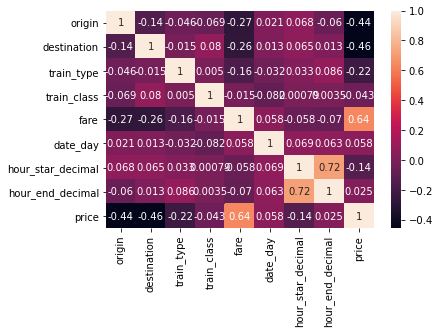

In [13]:
# Muestro la matriz de correlación
sns.heatmap(df_graf.corr(), annot = True)

#### 2. Dividir X_train, X_test, y_train, y_test

In [10]:
# Divido la muestra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [74]:
k_fold = RepeatedKFold(n_splits=20, n_repeats=1, random_state=1)
val_score = []
train_score = []
# define the model
model_RFR = RandomForestRegressor(n_estimators=160, random_state=1, warm_start=True)

for i, (train, val) in enumerate(k_fold.split(X_train)):
    print("Iteración:", i+1)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    print("val:", val)
    print("val_size:", len(val))
    print("batch:", X_train[train])
    # train the model
    model_RFR.fit(X_train[train], y_train[train]) # Aquí estoy entrenando con cross validation pq entreno cachito a cachito y me va a dar mejor score
    score_val = model_RFR.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model_RFR.score(X_train[train], y_train[train])
    train_score.append(score_train)

 1846  1870  1908  1920  1948  1952  1957  1965  2026  2059  2062
  2071  2110  2111  2121  2125  2152  2163  2170  2211  2238  2259  2260
  2269  2283  2299  2301  2306  2317  2323  2329  2368  2380  2386  2396
  2449  2466  2494  2496  2511  2607  2609  2614  2642  2662  2686  2693
  2715  2716  2725  2771  2786  2798  2826  2830  2891  2892  2898  2952
  2960  3007  3020  3025  3031  3033  3056  3061  3070  3106  3124  3129
  3133  3138  3150  3170  3200  3226  3241  3250  3278  3294  3297  3340
  3345  3352  3403  3413  3429  3430  3542  3546  3547  3617  3638  3651
  3702  3742  3752  3800  3852  3879  3902  3910  3930  3950  3965  3970
  3997  4024  4037  4043  4110  4131  4160  4199  4201  4251  4262  4279
  4308  4338  4366  4377  4384  4408  4419  4430  4449  4457  4508  4564
  4574  4588  4690  4707  4734  4735  4750  4756  4775  4787  4788  4795
  4808  4832  4833  4860  4863  4889  4910  4916  4927  4929  4955  5010
  5030  5038  5040  5057  5077  5088  5093  5105  5115  51

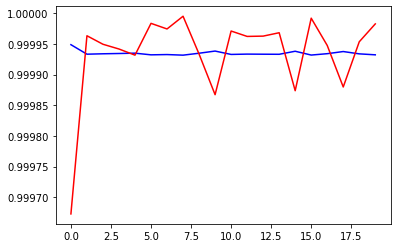

In [75]:
plt.plot(train_score, color="b")
plt.plot(val_score, color="r")

In [70]:
score_RFR_KFold = model_RFR.score(X_test, y_test)
score_RFR_KFold 

0.9998449083026436

In [71]:
y_pred = model_RFR.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.3272224977476967


In [ ]:
# Create a pipeline

# Le podemos poner cualquier clasificador. Irá cambiando según va probando pero necesita 1.
pipe = Pipeline(steps=[('classifier', RandomForestRegressor())])


logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
    }

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [10, 100, 1000],
    'classifier__max_features': [1, 2, 3]
    }

svm_params = {
    'classifier': [svm.SVC()],
    'classifier__kernel':('linear', 'rbf', 'sigmoid'), 
    'classifier__C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    'classifier__degree': to_test,
    'classifier__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'classifier__gamma': ('scale', 'auto')
    }


# Create space of candidate learning algorithms and their hyperparameters
search_space = [
    logistic_params,
    random_forest_params,
    #svm_params
    ]

In [ ]:
%%time

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# Create grid search 
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=cv, verbose=10, n_jobs=-1)

# Fit grid search
best_model = clf.fit(X_train_grid, y_train_grid)
# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
#SAVE MODEL
# save the model to disk
filename = 'finished_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

#### 3. Asignar el modelo a una variable
Aquí se pondrían los parámetros

#### 4. Entrenar el modelo con X_train, y_train

5. Predecir con el modelo ya entrenado con X_test/to_pred

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [35]:
to_pred = pd.read_csv("test_set.csv")

In [36]:
# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred.head()

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day
0,BARCELONA,MADRID,AVE,Turista,Promo,18,25,20,55,2
1,BARCELONA,MADRID,AVE,Turista,Promo +,14,0,17,10,5
2,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,14,10,15,15,3
3,MADRID,ZARAGOZA,AVE,Turista,Promo,20,45,22,6,1
4,MADRID,BARCELONA,AVE,Turista,Promo,18,30,21,20,4


In [37]:
#Cambio las columnas de las horas y su formato
to_pred['hour_star_decimal'] = to_pred['start_date_hour'] + round(to_pred['start_date_minute']/60, 4)
to_pred['hour_star_decimal']
to_pred['hour_end_decimal'] = to_pred['end_date_hour'] + round(to_pred['end_date_minute']/60, 4)
to_pred.head()

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,hour_star_decimal,hour_end_decimal
0,BARCELONA,MADRID,AVE,Turista,Promo,18,25,20,55,2,18.4167,20.9167
1,BARCELONA,MADRID,AVE,Turista,Promo +,14,0,17,10,5,14.0000,17.1667
2,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,14,10,15,15,3,14.1667,15.2500
3,MADRID,ZARAGOZA,AVE,Turista,Promo,20,45,22,6,1,20.7500,22.1000
4,MADRID,BARCELONA,AVE,Turista,Promo,18,30,21,20,4,18.5000,21.3333


In [38]:
to_predX = to_pred.drop(['start_date_hour', 'start_date_minute','end_date_hour','end_date_minute'], axis=1)
to_predX.head()

,origin,destination,train_type,train_class,fare,date_day,hour_star_decimal,hour_end_decimal
0,BARCELONA,MADRID,AVE,Turista,Promo,2,18.4167,20.9167
1,BARCELONA,MADRID,AVE,Turista,Promo +,5,14.0000,17.1667
2,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,3,14.1667,15.2500
3,MADRID,ZARAGOZA,AVE,Turista,Promo,1,20.7500,22.1000
4,MADRID,BARCELONA,AVE,Turista,Promo,4,18.5000,21.3333


In [39]:
# Aplico Encode a las columnas categóricas.
to_pred_categorical_no_numbers = to_predX[to_predX.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
to_pred_categorical_no_numbers.head()

,origin,destination,train_type,train_class,fare
0,0,1,2,1,3
1,0,1,2,1,4
2,3,1,1,1,0
3,1,4,2,1,3
4,1,0,2,1,3


In [40]:
#El resto de las columnas será
to_pred_others = to_predX.select_dtypes(exclude=['object'])
to_pred_others.head()

,date_day,hour_star_decimal,hour_end_decimal
0,2,18.4167,20.9167
1,5,14.0000,17.1667
2,3,14.1667,15.2500
3,1,20.7500,22.1000
4,4,18.5000,21.3333


In [41]:
# Dataframe con valores categoricos encode más valores numéricos.
to_pred_final = pd.concat([to_pred_categorical_no_numbers,to_pred_others], axis=1)
to_pred_final.head()

,origin,destination,train_type,train_class,fare,date_day,hour_star_decimal,hour_end_decimal
0,0,1,2,1,3,2,18.4167,20.9167
1,0,1,2,1,4,5,14.0000,17.1667
2,3,1,1,1,0,3,14.1667,15.2500
3,1,4,2,1,3,1,20.7500,22.1000
4,1,0,2,1,3,4,18.5000,21.3333


In [61]:
pred_submit = model_RFR.predict(to_pred_final)
pred_submit

array([101.397     ,  81.7       ,  31.1       , ...,  31.1       ,
        91.49544072,  55.7       ])

In [62]:
submission_RFR = pd.DataFrame({'id': sample['id'], 'price': pred_submit})
submission_RFR

,id,price
0,18019,101.397000
1,10977,81.700000
2,3461,31.100000
3,9964,30.100000
4,35955,86.050000
...,...,...
29175,25614,31.100000
29176,35667,80.550000
29177,38049,31.100000
29178,20679,91.495441


In [63]:
sample = pd.read_csv("sample_submission.csv")

In [48]:
sample.shape

(29180, 2)

In [64]:
if submission_RFR.shape == sample.shape:
    if submission_RFR.columns.all() == sample.columns.all():
        if submission_RFR.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission_RFR.to_csv("to_submit_RFR1.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
